## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:https://github.com/vnelima/Phase-1_Project_Aviation_


# Business Proposal on Aviation Business Investment

# Project Overview
# For this project, you will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.


# Business Problem
# Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


# Objectives
To identify which aircrafts or make have the lowest risk in terms of incident and accident rates
To identify locations or environments where incidents or accidents are most prone
To determine whether to invest in amateur aircrafts in regard with frequency of accidents and incidents
To determine the make with least no. of fatalities
To determine factors that contribute to aircraft risk, that is, make/model, weather condition, Location
To determine purpose of the flight


In [47]:
# Importing Libraries
# numpy is a python library that helps us work with large arrays
import numpy as np
# pandas is used for manipulating spreadsheets
import pandas as pd
# matplotlib enbles us to plot a line plot with x and y axis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [48]:
# Reading dataset from CSV file
df = pd.read_csv("AviationData.csv", encoding='latin-1')
df

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2.02212E+13,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,91,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,2.02212E+13,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,91,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,2.02212E+13,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,91,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [49]:
# Reviewing the first 5 rows of the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [50]:
# column check
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [51]:
# checking the number of columns
len(df.columns)

31

In [52]:
# Reviewing the last 5 rows of the dataset
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,91,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,2.02212E+13,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,91,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,2.02212E+13,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,91,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,12/29/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,91,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


# Data Cleaning

In [53]:
# Assessing Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [54]:
# To calculate statistical data, mean, median, mode, percentile
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [55]:
# Dropping columns that we will not need during analysis and that do not feed into our main objectives
df.drop(columns=['Event.Id', 'Latitude', 'Longitude', 'Airport.Code', 'Schedule', 'Air.carrier', 'Report.Status', 'Publication.Date' ], inplace=True)
df


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,91,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,91,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88887,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,91,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [56]:

# To get mode in the Aircraft.Category column

mode_value = df['Aircraft.Category'].mode()
mode_value

0    Airplane
dtype: object

In [57]:
# To fill the null values with mode in the Aircraft.category column
df['Aircraft.Category'] = df['Aircraft.Category'].fillna(mode_value, inplace=True)

In [58]:
# To change all letters to be uppercase in the Make column
df['Make'] = df['Make'].str.upper()
df['Make']

0                           STINSON
1                             PIPER
2                            CESSNA
3                          ROCKWELL
4                            CESSNA
                    ...            
88884                         PIPER
88885                      BELLANCA
88886    AMERICAN CHAMPION AIRCRAFT
88887                        CESSNA
88888                         PIPER
Name: Make, Length: 88889, dtype: object

In [59]:
 # # To change all letters to be uppercase in the Make column combined with the unique items in the Make column
# df['combined Make'] = df['Make'] + df['unique_code'].astype(str)
pd.set_option("display.max_columns", None)
Make_counts = df['Make'].unique()

Make_counts


array(['STINSON', 'PIPER', 'CESSNA', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [60]:
# For uniformity in 'Make' column replacing CESNA with CESSNA and Airbus Industrie with Airbus 
# Define replacements
replacements = {'CESNA': 'CESSNA','Airbus Industrie': 'Airbus'}
# Apply replacements
df['Make'] = df['Make'].replace(replacements, regex=True)

In [61]:
# Checking for missing values in the data set so as to ensure dataset is complete
df.isnull().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         88889
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [62]:
# replacing the null values in the columns with 'unknown'
columns_to_replace = ['Location', 'Country', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description','Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured', 'Broad.phase.of.flight']
df[columns_to_replace] = df[columns_to_replace].fillna('unknown')
# Replacing null values in 'Weather.Condition' with 'UNK'
df['Weather.Condition'].fillna('UNK')
# Replace "Unk" with "UNK" in the 'Weather.Condition' column
df['Weather.Condition'] = df['Weather.Condition'].replace('Unk', 'UNK')

# Verify the change
print(df['Weather.Condition'].unique())


df

['UNK' 'IMC' 'VMC' nan]


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,unknown,Fatal(2),Destroyed,None,NC6404,STINSON,108-3,No,1,Reciprocating,unknown,Personal,2,0,0.0,0,UNK,Cruise
1,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,unknown,Fatal(4),Destroyed,None,N5069P,PIPER,PA24-180,No,1,Reciprocating,unknown,Personal,4,0,0.0,0,UNK,Unknown
2,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,unknown,Fatal(3),Destroyed,None,N5142R,CESSNA,172M,No,1,Reciprocating,unknown,Personal,3,unknown,NaN,unknown,IMC,Cruise
3,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,unknown,Fatal(2),Destroyed,None,N1168J,ROCKWELL,112,No,1,Reciprocating,unknown,Personal,2,0,0.0,0,IMC,Cruise
4,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,unknown,Fatal(1),Destroyed,None,N15NY,CESSNA,501,No,unknown,unknown,unknown,Personal,1,2,NaN,0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,unknown,Minor,unknown,None,N1867H,PIPER,PA-28-151,No,unknown,unknown,91,Personal,0,1,0.0,0,NaN,unknown
88885,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,unknown,unknown,unknown,None,N2895Z,BELLANCA,7ECA,No,unknown,unknown,unknown,unknown,0,0,0.0,0,NaN,unknown
88886,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,PAYSON,Non-Fatal,Substantial,None,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1,unknown,91,Personal,0,0,0.0,1,VMC,unknown
88887,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,unknown,unknown,unknown,None,N210CU,CESSNA,210N,No,unknown,unknown,91,Personal,0,0,0.0,0,NaN,unknown


In [63]:
# To get a list of all column names in the dataset
column_names = df.columns.tolist()
column_names

['Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Purpose.of.flight',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight']

In [64]:
import pandas as pd

# Group by 'Make' and 'Model', count the number of incidents (rows)
accident_frequency = df.groupby(['Make', 'Model']).size().reset_index(name='Accident_Frequency')

# Sort the results by 'Accident_Frequency' to find models with the highest incident counts
accident_frequency_sorted = accident_frequency.sort_values(by='Accident_Frequency', ascending=False)

# Display the top 10 aircraft models with the highest accident frequency
print(accident_frequency_sorted.head(10))


         Make      Model  Accident_Frequency
4670   CESSNA        152                2366
4694   CESSNA        172                1753
4745   CESSNA       172N                1163
13569   PIPER  PA-28-140                 932
4643   CESSNA        150                 829
4743   CESSNA       172M                 798
4748   CESSNA       172P                 689
4802   CESSNA        182                 659
4778   CESSNA        180                 621
4669   CESSNA       150M                 585


In [65]:
# Group by 'Aircraft.Category' to count the number of incidents
accidents_by_category = df.groupby('Aircraft.Category').size().reset_index(name='Incident_Count')

# Sort the data to see which category has the highest number of incidents
accidents_by_category_sorted = accidents_by_category.sort_values(by='Incident_Count', ascending=False)

# Display the result
print(accidents_by_category_sorted)


Empty DataFrame
Columns: [Aircraft.Category, Incident_Count]
Index: []


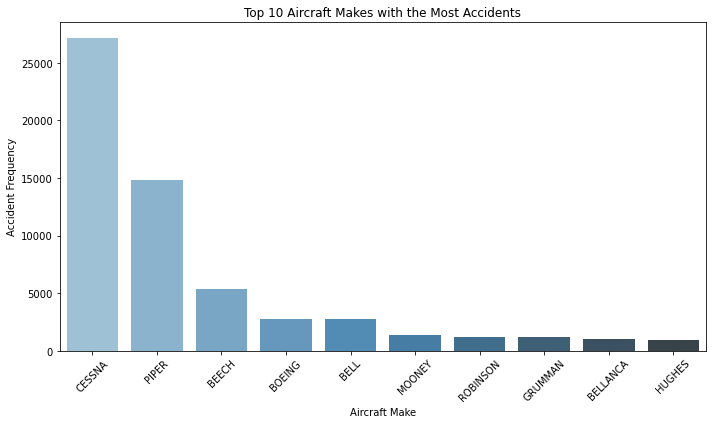

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Makes with the highest accident frequency
top_10_makes = accident_frequency.groupby('Make').sum().sort_values(by='Accident_Frequency', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_makes.index, y=top_10_makes['Accident_Frequency'], palette='Blues_d')
plt.title('Top 10 Aircraft Makes with the Most Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Accident Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

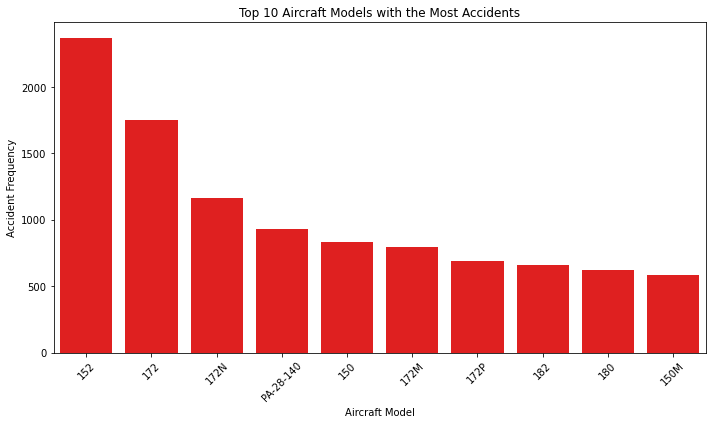

In [67]:
# Top 10 Models with the highest accident frequency
top_10_models = accident_frequency_sorted.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accident_Frequency', data=top_10_models, color='Red')
plt.title('Top 10 Aircraft Models with the Most Accidents')
plt.xlabel('Aircraft Model')
plt.ylabel('Accident Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
# Group by 'Make', 'Model', and 'Aircraft.Category' to calculate accident frequency
accident_frequency = df.groupby(['Make', 'Model', 'Aircraft.Category']).size().reset_index(name='Accident_Frequency')

# Sort the results by 'Accident_Frequency' to get the most frequent accidents
accident_frequency_sorted = accident_frequency.sort_values(by='Accident_Frequency', ascending=False)

# Display the top 10
print(accident_frequency_sorted.head(10))


Empty DataFrame
Columns: [Make, Model, Aircraft.Category, Accident_Frequency]
Index: []


In [69]:
# Check data types of the injury columns
print(df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].dtypes)

# Check for non-numeric values in these columns
print(df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].apply(pd.to_numeric, errors='coerce').isnull().sum())


Total.Fatal.Injuries       object
Total.Serious.Injuries     object
Total.Minor.Injuries      float64
dtype: object
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
dtype: int64


In [70]:
# Select injury-related columns
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Ensure the injury columns are numeric
df[injury_columns] = df[injury_columns].apply(pd.to_numeric, errors='coerce')

# Recalculate the Severity Index
df['Severity_Index'] = (df['Total.Fatal.Injuries'] * 3 + 
                        df['Total.Serious.Injuries'] * 2 + 
                        df['Total.Minor.Injuries'] * 1) / (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + 1)

# Display the top 10 severity index results
severity_index_sorted = df.groupby(['Make', 'Model', 'Aircraft.Category'])['Severity_Index'].mean().reset_index()
severity_index_sorted = severity_index_sorted.sort_values(by='Severity_Index', ascending=False)
print(severity_index_sorted.head(10))


Empty DataFrame
Columns: [Make, Model, Aircraft.Category, Severity_Index]
Index: []


  Weather.Condition  Accident_Frequency
2               VMC               77303
0               IMC                5976
1               UNK                1118


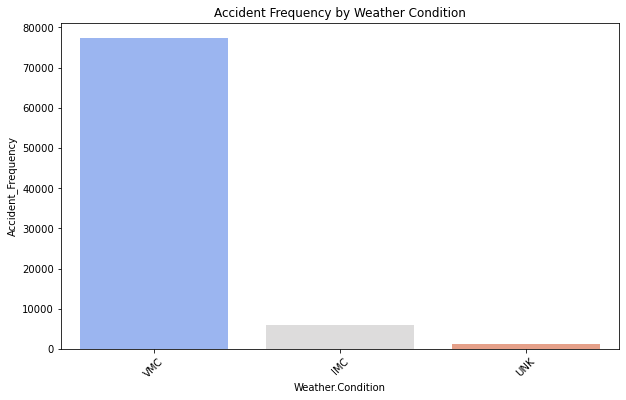

In [71]:
# Group by 'Weather.Condition' to calculate the accident frequency under different weather conditions
weather_impact = df.groupby('Weather.Condition').size().reset_index(name='Accident_Frequency')

# Sort the results by frequency
weather_impact_sorted = weather_impact.sort_values(by='Accident_Frequency', ascending=False)

# Display the weather conditions with the highest accident frequency
print(weather_impact_sorted.head(10))

# To visualize accident frequency by weather conditions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Weather.Condition', y='Accident_Frequency', data=weather_impact_sorted, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Accident Frequency by Weather Condition')
plt.show()


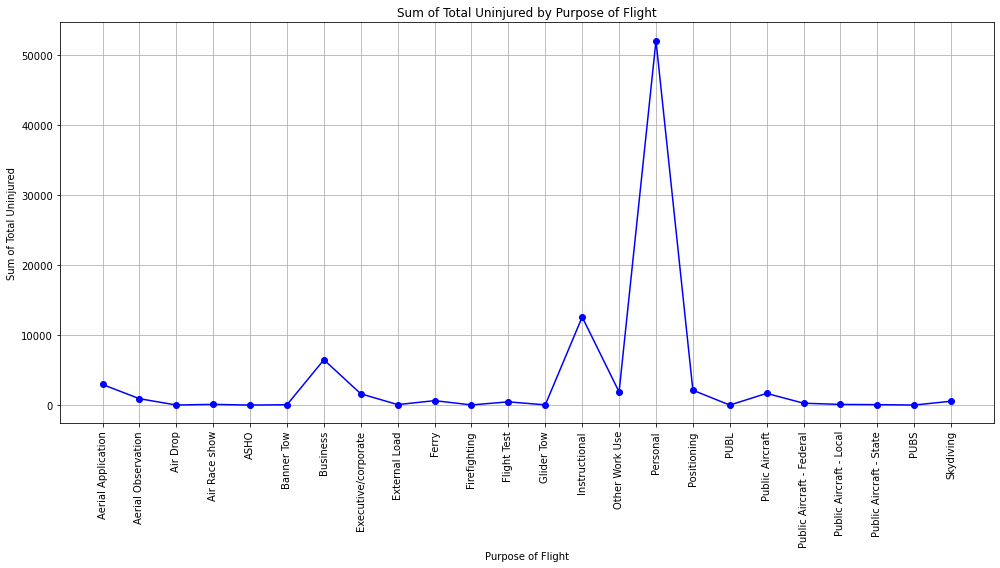

In [73]:
# To check the purpose of flight vs the total uninjured cases
# Data
purposes = ['Aerial Application', 'Aerial Observation', 'Air Drop', 'Air Race show','ASHO', 'Banner Tow', 'Business', 'Executive/corporate', 'External Load',
'Ferry', 'Firefighting', 'Flight Test', 'Glider Tow', 'Instructional','Other Work Use', 'Personal', 'Positioning', 'PUBL', 'Public Aircraft','Public Aircraft - Federal',
'Public Aircraft - Local', 'Public Aircraft - State','PUBS', 'Skydiving']
uninjured_counts = [2944, 912, 10, 103, 1, 52, 6471, 1611, 69, 634, 24, 461, 32, 12580,1878, 52052, 2122, 2, 1671, 267, 96, 65, 5, 555]

# Create the plot
plt.figure(figsize=(14, 8))
plt.plot(purposes, uninjured_counts, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Sum of Total Uninjured by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Sum of Total Uninjured')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [74]:
df.columns

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Severity_Index'],
      dtype='object')

In [75]:
# Group by airport code to get the frequency of accidents
airport_accidents = df.groupby('Airport.Name').size().reset_index(name='Accident_Count')
airport_accidents_sorted = airport_accidents.sort_values(by='Accident_Count', ascending=False)

# Display top 10 airports with the most accidents
print(airport_accidents_sorted.head(10))


           Airport.Name  Accident_Count
24869           unknown           36099
18126           Private             240
17494           PRIVATE             224
18135  Private Airstrip             153
15729              NONE             146
17518     PRIVATE STRIP             111
17503  PRIVATE AIRSTRIP              92
16051              None              86
14006     MERRILL FIELD              83
23150          VAN NUYS              81


In [76]:
# Group by 'Amateur.Built' to compare accident frequencies
amateur_vs_non_amateur = df.groupby('Amateur.Built').size().reset_index(name='Accident_Frequency')

# Calculate percentage of accidents for each category
total_accidents = df['Amateur.Built'].count()
amateur_vs_non_amateur['Percentage'] = (amateur_vs_non_amateur['Accident_Frequency'] / total_accidents) * 100

print(amateur_vs_non_amateur)


  Amateur.Built  Accident_Frequency  Percentage
0            No               80312   90.350887
1           Yes                8475    9.534363
2       unknown                 102    0.114750


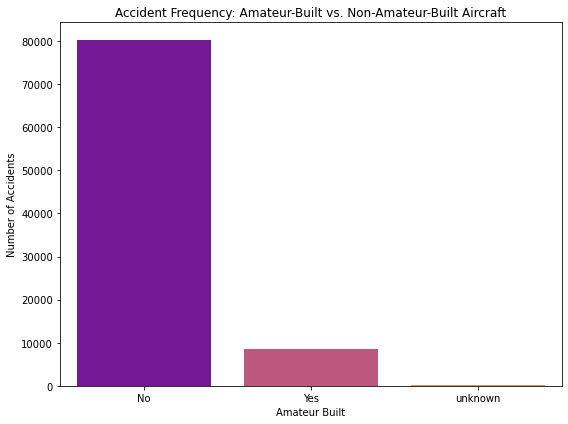

In [77]:
# Bar plot for accident frequency comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Amateur.Built', y='Accident_Frequency', data=amateur_vs_non_amateur, palette='plasma')
plt.title('Accident Frequency: Amateur-Built vs. Non-Amateur-Built Aircraft')
plt.xlabel('Amateur Built')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


In [78]:
# Group by 'Purpose.of.flight' and calculate accident frequency
accident_rates_by_purpose = df.groupby('Purpose.of.flight').size().reset_index(name='Accident_Count')

# Calculate the total number of accidents for normalization
total_accidents = df.shape[0]

# Calculate the percentage of accidents for each purpose
accident_rates_by_purpose['Accident_Percentage'] = (accident_rates_by_purpose['Accident_Count'] / total_accidents) * 100

print(accident_rates_by_purpose)


            Purpose.of.flight  Accident_Count  Accident_Percentage
0                        ASHO               6             0.006750
1          Aerial Application            4712             5.300993
2          Aerial Observation             794             0.893249
3                    Air Drop              11             0.012375
4               Air Race show              99             0.111375
5               Air Race/show              59             0.066375
6                  Banner Tow             101             0.113625
7                    Business            4018             4.520244
8         Executive/corporate             553             0.622124
9               External Load             123             0.138375
10                      Ferry             812             0.913499
11               Firefighting              40             0.045000
12                Flight Test             405             0.455624
13                 Glider Tow              53             0.05

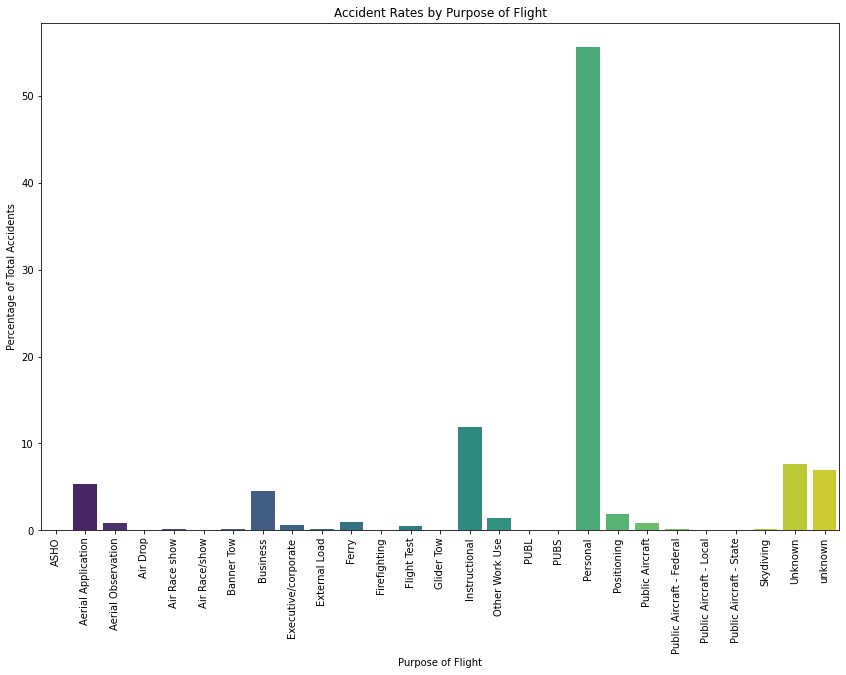

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for accident rates by flight purpose
plt.figure(figsize=(12, 8))
sns.barplot(x='Purpose.of.flight', y='Accident_Percentage', data=accident_rates_by_purpose, palette='viridis')
plt.title('Accident Rates by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Percentage of Total Accidents')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()
